# Documentation for Hydra Multi-Asset Verification Test

## Composite Action Tests
The methodology for the tests is 
- A comparison of two models: 
    - 1 Hydra Omnipool instance and 
    - 1 Uniswap instance
- and the duplication of:
    - identical transactions in the modeled Hydra system 
    - in modeled Uniswap instances of reserve token R_x paired with pooled Hydra Q.

## Description of testcase represented in this notebook

This jupyter notebook summerizes the results of the following experiment
- The agent trades q for i..
- 
-
-



## Test settings

exo_trade = ['test_q_for_r'] # agent 0

exo_liq = ['test_remove'] # agent 3

exo_asset = ['alternating']

exo_composite = ['alternating'] 

## Introduction to Uniswap
>Uniswap is an automated market maker for exchanging ERC20 tokens. Anyone can become a liquidity provider, and invest in the liquidity pool of an ERC20 token. This allows other users to trade that token for other tokens at an exchange rate based on their relative availibility. When a token trade is executed, a small fee is paid to the liquidity providers that enabled the transaction.
https://uniswap.io/

There are basically eight ways (_mechanisms_) in which an agent can interact with an instance of Uniswap (https://github.com/Uniswap/uniswap-v1/blob/master/contracts/uniswap_exchange.vy):
1. `addLiquidity`: deposit ETH and tokens in the liquidity pool; mint UNI tokens - "shares" of that Uniswap instance - in exchange;
1. `removeLiquidity`: burn UNI tokens; withdraw a proportional amount of ETH and tokens in exchange;
1. `ethToTokenInput`: user specifies an exact amount of ETH they send; receives corresponding amount of tokens
1. `ethToTokenOutput`: user sends some ETH and specifies an exact amount of tokens they want to buy; Uniswap refunds ETH sent in excess
1. `tokenToEthInput`: user specifies an exact amount of tokens they send; receives corresponding amount of ETH
1. `tokenToEthOutput`: user specifies an exact amount of ETH they want to buy; Uniswap takes the corresponding amount of tokens from the user account
1. `tokenToTokenInput`: user specifies an exact amount of "token A" they send; receives corresponding amount of "token B" (effectively a `tokenToEthInput` in instance A combined with a `ethToTokenInput` in instance B)
1. `tokenToTokenOutput`: user specifies an exact amount of "token B˜ they want to buy; Uniswap takes the corresponding amount of "token A" from the user account (effectively a `ethToTokenOutput` in instance B combined with a `tokenToEthOutput` in instance A)

## Limitations and simplifications of this model
* When triggering mechanisms, Uniswap users may include conditions they would like to apply to the transaction. For example, they could define a minimum amount of UNI tokens they wish to receive as a result of adding liquidity to the pool; or the maximum number of tokens they are willing to pay for the amount of ETH requested in a `tokenToEthOutput` operation; or a deadline after which the transaction should not be processed. **This simplified model does not account for this kind conditioning.**

* The `ethToTokenOutput`, `tokenToEthOutput` mechanisms are not implemented. **All swaps are treated as of the "input defined" type.**

* The `tokenToToken` mechanism are not implemented, as they are merely a `tokenToEth` in the context of a single Uniswap instance.

* **User _behavior_ has not been modeled**. User _actions_ are derived from the history of events of the Uniswap instance being analyzed.

## Introduction to Hydra
>Hydra is an automated market maker that generalizes the concept of Uniswap and Balancer to a) an arbitrary number of dimensions and b) a variant weight distaribution of assets in the pool that changes in accordance with action sequences in the pool. Anyone can become a liquidity provider, and invest in the 'Omnipool'. This allows other users to trade that token for other tokens at an exchange rate based on their relative availibility. When a token trade is executed, a small fee is paid to the liquidity providers that enabled the transaction.
https://hydradx.io/

There is a predefined set of (_mechanisms_) in which an agent can interact with an the Hydra Protocol :
1. `addLiquidity`: deposit a risk asset in the omnipool; mint HDX tokens - "shares" of this risk asset - in exchange;
1. `removeLiquidity`: burn HDX tokens; withdraw a proportional amount of the risk asset in exchange;
1. `tokenToTokenInput`: user specifies an exact amount of "token A" they send; receives corresponding amount of "token B" 
1. `tokenToTokenOutput`: user specifies an exact amount of "token B˜ they want to buy; Hydra takes the corresponding amount of "token A" from the user account 



## Model File structure

The model file consists of:
- the **Jupyter Test Notebooks**: 
    - For each experiment one .ipynb file is generated
- and a **folder containing the model**
    - which has 4 files: 
        - the [config.py](model/config.py): contains the simulation configurations, aggregating the partial states, and the state variables, 
        - [partial_state_update_block.py](model/partial_state_update_block.py): contains the partial state update blocks and how they update the state variables,
        - [run.py](model/run.py): actually runs the simulation., and
        - [state_variables.py](state_variables.py): defines the state variables
    - and an additional folder 'parts' containing: 
        - [action.py](model/parts/action.py): Action dictionary drives the model. Currently, actions are prescribed actions in testing mode. However, action schema respects https://www.kaggle.com/markusbkoch/uniswap-ethdai-exchange as much as possible, allowing for future analysis against uniswap transaction datasets.  
        
        - [uniswap.py](model/parts/uniswap.py): Reads in action output and directs the action to the appropriate Uniswap mechanism for each corresponding Uniswap instance (currently R_i<>Q pair and R_j<>Q pair) and its requisite state variable: UNI_Qx, UNI_Rx, and UNI_Sx.

        - [utils.py](model/parts/utils.py): Computes the state update for each Uniswap state variable
        
        - [agent_utils.py](model/parts/agent_utils.py): Computes the corresponding agent local state for each Uniswap agent resolving their action

        -  [hydra.py](model/parts/hydra.py): Reads in action output and directs the action to the appropriate Hydra mechanism for each state variable: Q, Sq, and pool.
    
        - [hydra_utils.py](model/parts/hydra_utils.py): Computes the state update for each Hydra state variable

        -  [asset_utils.py](model/parts/asset_utils.py): Computes the state update for each Reserve Asset in a Hydra Omnipool

        -  [hydra_agent_utils_class.py](model/parts/hydra_agent_utils_class.py): Computes the corresponding agent local state for each Hydra agent resolving their action

The initial parameters and hyperparameters of the system are defined in [sys_params.py](model/sys_params.py) and helper functions, plots, etc. are in the [utils.py](model/parts/utils.py).



## Run Model

The following command lines import all packages, experiments and run the model 

In [5]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments
from model import run
from model.parts.utils import *
from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

df = run.run()
rdf = run.postprocessing(df)
# rdf = df # debugging substeps



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 7, 1, 15)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded


C:\Users\paruc\Documents\Paruch\Hydra\Phase3\cadcad\hydra\hydra_multi_class\model\parts\agent_utils.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_agent['h'] = chosen_agent['h'] + q_bought
C:\Users\paruc\Documents\Paruch\Hydra\Phase3\cadcad\hydra\hydra_multi_class\model\parts\agent_utils.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_agent['r_' + asset_id + '_out'] = chosen_agent['r_' + asset_id + '_out'] - ri
C:\Users\paruc\Documents\Paruch\Hydra\Phase3\cadcad\hydra\hydra_multi_

Total execution time: 6.70s


C:\Users\paruc\Documents\Paruch\Hydra\Phase3\cadcad\hydra\hydra_multi_class\model\parts\hydra_agent_utils_class.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_agent['r_' + asset_id + '_out'] = chosen_agent['r_' + asset_id + '_out'] - delta_R
C:\Users\paruc\Documents\Paruch\Hydra\Phase3\cadcad\hydra\hydra_multi_class\model\parts\agent_utils.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_agent['h'] = chosen_agent['h'] + q_bought
C:\Users\paruc\Documents\Paruch\Hydra\Phase3\cadcad\h

## Analysis of Results

### Creation of Results

The following command lines create
- the `model_history`, which is a list of asset quantities $\begin{pmatrix} Q_i, R_i, S_i \end{pmatrix}$ counting the i-th base asset, the risk asset and the shares of the risk asset respectively.
- the `uniswap_j`, which is a list of asset quantities $\begin{pmatrix} Q_j, R_j, S_j \end{pmatrix}$ counting the j-th base asset, the risk asset and the shares of the risk asset respectively., and
- `hydra`, which is a list of quantities $\begin{pmatrix} Q, H, S_q \end{pmatrix}$ counting the base asset amount in the pool, the total base asset supply and the shares of the base asset respectively.

In [6]:
model_history = rdf[['UNI_Qi', 'UNI_Ri', 'UNI_Si']]
model_history.columns = ['model_UNI_Qi', 'model_UNI_Ri', 'model_UNI_Si']

uniswap_j = rdf[['UNI_Qj', 'UNI_Rj', 'UNI_Sj']]
uniswap_j.columns = ['UNI_Qj', 'UNI_Rj', 'UNI_Sj']

hydra = rdf[['Q', 'H', 'Sq']]
hydra.columns = ['Hydra_Q', 'Hydra_H', 'Hydra_Sq']

### Visualization of pool instances

The following command line shows the **first (1st) iteration** of the pool instance for the $i$-th and the $j$-th asset respectively listing the realizations of the variables:

- $R$ (asset quantity),
- $S$ (share quantity),
- $W$ (weight quantity = share quantity),
- $P$ (price) and 
- $dP$ (change in price).

In [7]:
print(rdf.pool[rdf.first_valid_index()])

<class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 1000000, 'S': 200000000000, 'W': 200000000000, 'P': 0.19999999999999998, 'dP': 0.0}, 'j': {'R': 1002000, 'S': 200400000000.0, 'W': 200400000000.0, 'P': 0.19999999999999998, 'dP': 0.0}}}


In [8]:
rdf.pool[rdf.first_valid_index()].pool

{'i': {'R': 1000000,
  'S': 200000000000,
  'W': 200000000000,
  'P': 0.19999999999999998,
  'dP': 0.0},
 'j': {'R': 1002000,
  'S': 200400000000.0,
  'W': 200400000000.0,
  'P': 0.19999999999999998,
  'dP': 0.0}}

The following command line shows the **tenth (10th) iteration** of the pool instance

In [9]:
rdf.pool[rdf.first_valid_index()*10].pool

{'i': {'R': 1005000,
  'S': 200000000000,
  'W': 200000000000,
  'P': 0.1985122792838256,
  'dP': -0.00029586834193626177},
 'j': {'R': 1010000,
  'S': 202000000000.0,
  'W': 202000000000.0,
  'P': 0.1995048406802447,
  'dP': -9.853953602018128e-05}}

The following command line shows the **final iteration** of the pool instance


In [10]:
rdf.pool[rdf.last_valid_index()].pool

{'i': {'R': 1500000,
  'S': 200000000000,
  'W': 200000000000,
  'P': 0.11292847012885218,
  'dP': -0.0001003836415455206},
 'j': {'R': 2000000,
  'S': 400000000000.0,
  'W': 400000000000.0,
  'P': 0.16939270519327826,
  'dP': -3.7546608547905924e-05}}

### Representing results in table form

The following command line shows a **table of the first five iterations** of the pool instance, visualizing all variables

##### for the uniswap instance
- `UNI_Qi`...the quantity of the i-th assets base
- `UNI_Ri`...the quantity of the i-th assets risk
- `UNI_Si`...the quantity of the i-th assets shares
- `UNI_Qj`...the quantity of the j-th assets base
- `UNI_Rj`...the quantity of the j-th assets risk
- `UNI_Sj`...the quantity of the j-th assets shares
- `uni_agents`...the definition of the actions of the uniswap agents
- `UNI_P_RQi`...the price of the i-th risk asset in terms of Q
- `UNI_P_RQj`...the price of the j-th risk asset in terms of Q

##### for the hydra instance
- `pool`...the definition of the pool instance
- `Q`...the quantity of the base asset in the hydra pool
- `H`...the total quantity of the base asset in the hydra system
- `Wq`...total quantity of weiths of the base asset
- `Sq`...total quantity of shares of the base asset
- `hydra_agents`...the definition of the actions of the hydra agents
- `simulation`...simulation number
- `subset`...subset number
- `run`...run number
- `substep`...substep number
- `timestep`...timestep of simulation

In [11]:
rdf.head(5)

UNI_Qi   UNI_Ri        UNI_Si  UNI_Qj   UNI_Rj        UNI_Sj  \
4   199801  1001000  200000000000  200000  1000000  200000000000   
8   199801  1001000  200000000000  200401  1002000  200400000000   
12  199603  1002000  200000000000  200401  1002000  200400000000   
16  199603  1002000  200000000000  200802  1004000  200800000000   
20  199405  1003000  200000000000  200802  1004000  200800000000   

                                           uni_agents  UNI_P_RQi  UNI_P_RQj  \
4        m   r_i_out   r_i_in          h      q_i ...       4.97       4.96   
8        m   r_i_out   r_i_in         h      q_i  ...       4.97       4.96   
12       m   r_i_out   r_i_in         h      q_i  ...       4.98       4.96   
16       m   r_i_out   r_i_in         h      q_i  ...       4.98       4.96   
20       m   r_i_out   r_i_in         h      q_i  ...       4.99       4.96   

                                                 pool         Q         H  \
4   <class 'model.parts.asset_utils.Asset'>: {'poo... 400400.00 400400.00   
8   <class 'model.parts.asset_utils.Asset'>: {'poo... 400200.75 400400.00   
12  <class 'model.parts.asset_utils.Asset'>: {'poo... 400600.55 400799.80   
16  <class 'model.parts.asset_utils.Asset'>: {'poo... 400401.60 400799.80   
20  <class 'model.parts.asset_utils.Asset'>: {'poo... 400801.20 401199.40   

                Wq              Sq  \
4  400400000000.00 400400000000.00   
8  400400000000.00 400400000000.00   
12 400800000000.00 400800000000.00   
16 400800000000.00 400800000000.00   
20 401200000000.00 401200000000.00   

                                         hydra_agents  simulation  subset  \
4        m   r_i_out   r_i_in          h      q_i ...           0       0   
8        m   r_i_out   r_i_in         h      q_i  ...           0       0   
12       m   r_i_out   r_i_in         h      q_i  ...           0       0   
16       m   r_i_out   r_i_in         h      q_i  ...           0       0   
20       m   r_i_out   r_i_in         h      q_i  ...           0       0   

    run  substep  timestep  
4     1        4         1  
8     1        4         2  
12    1        4         3  
16    1        4         4  
20    1        4         5

The following command line shows a table of the **last five iterations** of the pool instance, visualizing all variables (same as above)

In [12]:
rdf.tail()

UNI_Qi   UNI_Ri        UNI_Si  UNI_Qj   UNI_Rj        UNI_Sj  \
3984  133878  1498000  200000000000  399698  1996000  399200000000   
3988  133789  1499000  200000000000  399698  1996000  399200000000   
3992  133789  1499000  200000000000  400099  1998000  399600000000   
3996  133701  1500000  200000000000  400099  1998000  399600000000   
4000  133701  1500000  200000000000  400500  2000000  400000000000   

                                             uni_agents  UNI_P_RQi  UNI_P_RQj  \
3984       m   r_i_out   r_i_in         h      q_i  ...      11.07       4.97   
3988       m   r_i_out   r_i_in         h      q_i  ...      11.09       4.97   
3992       m   r_i_out   r_i_in         h      q_i  ...      11.09       4.97   
3996       m   r_i_out   r_i_in         h      q_i  ...      11.10       4.97   
4000       m   r_i_out   r_i_in         h      q_i  ...      11.10       4.97   

                                                   pool         Q         H  \
3984  <class 'model.parts.asset_utils.Asset'>: {'poo... 507725.70 581576.86   
3988  <class 'model.parts.asset_utils.Asset'>: {'poo... 508064.63 581915.80   
3992  <class 'model.parts.asset_utils.Asset'>: {'poo... 507951.89 581915.80   
3996  <class 'model.parts.asset_utils.Asset'>: {'poo... 508290.76 582254.66   
4000  <class 'model.parts.asset_utils.Asset'>: {'poo... 508178.12 582254.66   

                  Wq              Sq  \
3984 599200000000.00 599200000000.00   
3988 599600000000.00 599600000000.00   
3992 599600000000.00 599600000000.00   
3996 600000000000.00 600000000000.00   
4000 600000000000.00 600000000000.00   

                                           hydra_agents  simulation  subset  \
3984       m   r_i_out   r_i_in         h      q_i  ...           0       0   
3988       m   r_i_out   r_i_in         h      q_i  ...           0       0   
3992       m   r_i_out   r_i_in         h      q_i  ...           0       0   
3996       m   r_i_out   r_i_in         h      q_i  ...           0       0   
4000       m   r_i_out   r_i_in         h      q_i  ...           0       0   

      run  substep  timestep  
3984    1        4       996  
3988    1        4       997  
3992    1        4       998  
3996    1        4       999  
4000    1        4      1000

## Plotting the results

### quantities, i-th asset, uniswap instance

The following command lines **create three plots** that show: (for the i-th asset)
- on the left: the quantity of base asset `model_UNI_Qi` 
- center: the quantity of risk asset `model_UNI_Ri` 
- on the right: the quantity of shares `model_UNI_Si`
over all simulation steps

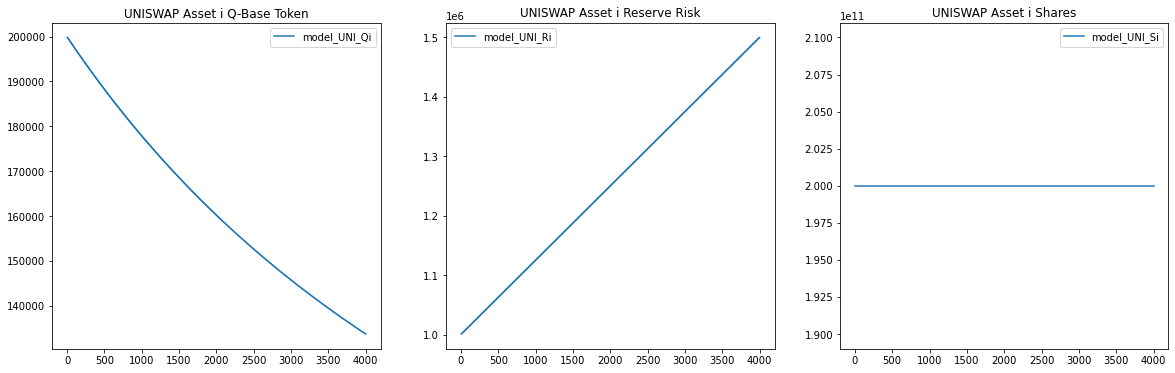

In [13]:
plt.figure(figsize=(20,6))
ax = plt.subplot(131)
model_history.astype(float).plot(ax=ax, y=['model_UNI_Qi'])
plt.title('UNISWAP Asset i Q-Base Token')

ax = plt.subplot(132)
model_history.astype(float).plot(ax=ax, y=['model_UNI_Ri'])
plt.title('UNISWAP Asset i Reserve Risk')

ax = plt.subplot(133)
model_history.astype(float).plot(ax=ax, y=['model_UNI_Si'])
plt.title('UNISWAP Asset i Shares')
plt.show()

### prices, i-th asset, uniswap instance

The following command line creates a plot of the prices: (for the i-th asset)
- the swap price
- the pool ratio price

the function has the following arguments: 

    def price_plot(experiments,test_title, price_swap, numerator, denominator)

and returns:

    token_ratio = 1/ ( df[numerator] / df[denominator]) 
    
    plt.plot(1/df[price_swap],label='Swap Price', marker='o') 
    
    plt.plot(token_ratio,label='Pool Ratio Price',marker='o') 
    
which means that it calculates and plots:

$$
\text{swap Price} = \frac{1}{\text{price_swap}}\\
\text{Pool ratio price} = \frac{1}{\frac{\text{numerator}}{\text{denominator}}}
$$

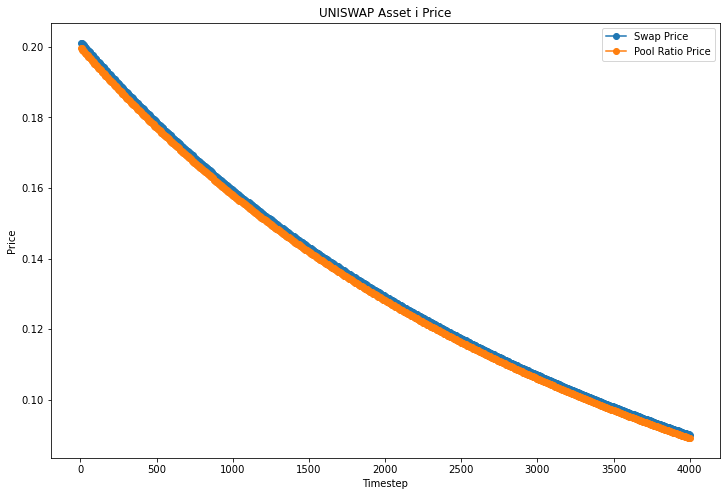

In [14]:
price_plot(rdf,'UNISWAP Asset i Price', 'UNI_P_RQi', 'UNI_Ri', 'UNI_Qi')

### quantities, j-th asset, uniswap instance

The following command lines create three plots that show: (for the j-th asset)
- on the left: the quantity of base asset `UNI_Qj` 
- center: the quantity of risk asset `UNI_Rj`
- on the right: the quantity of shares `UNI_Sj`

over the simulation steps

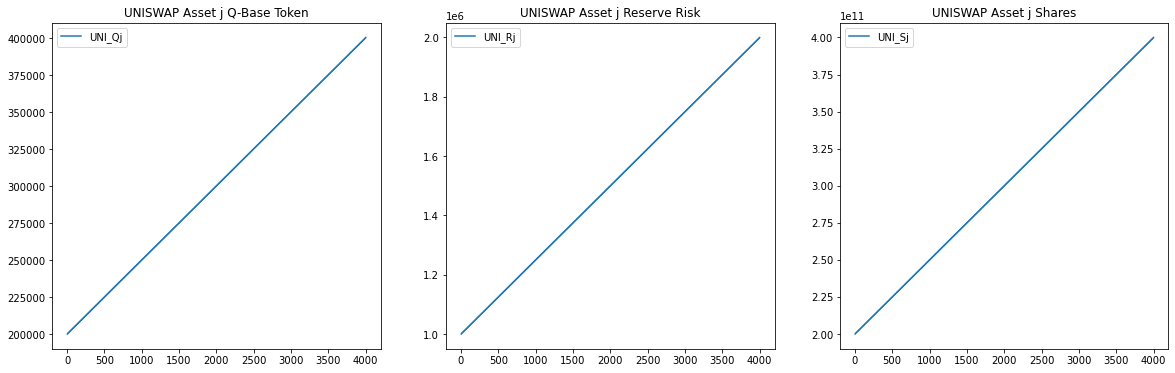

In [15]:
plt.figure(figsize=(20,6))
ax = plt.subplot(131)
uniswap_j.astype(float).plot(ax=ax, y=['UNI_Qj'])
plt.title('UNISWAP Asset j Q-Base Token')

ax = plt.subplot(132)
uniswap_j.astype(float).plot(ax=ax, y=['UNI_Rj'])
plt.title('UNISWAP Asset j Reserve Risk')

ax = plt.subplot(133)
uniswap_j.astype(float).plot(ax=ax, y=['UNI_Sj'])
plt.title('UNISWAP Asset j Shares')
plt.show()

### prices, j-th asset, uniswap instance

The following command line creates a plot of the prices: (for the j-th asset)
- the swap price
- the pool ratio price

the function has the following arguments: 

    def price_plot(experiments,test_title, price_swap, numerator, denominator)

and returns:

    token_ratio = 1/ ( df[numerator] / df[denominator]) 
    
    plt.plot(1/df[price_swap],label='Swap Price', marker='o') 
    
    plt.plot(token_ratio,label='Pool Ratio Price',marker='o') 

which means that it calculates and plots:

$$
\text{swap Price} = \frac{1}{\text{price_swap}}\\
\text{Pool ratio price} = \frac{1}{\frac{\text{numerator}}{\text{denominator}}}
$$

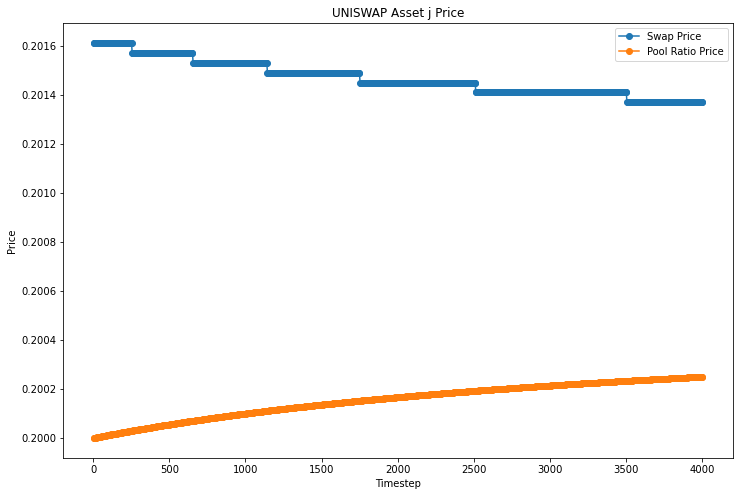

In [16]:
price_plot(rdf,'UNISWAP Asset j Price', 'UNI_P_RQj', 'UNI_Rj', 'UNI_Qj')

### quantities, base asset, hydra instance

The following command lines create three plots that show: (for the base asset)
- on the left: the quantity of base asset in the pool `Hydra_Q` 
- center: the total quantity of base asset in the system `Hydra_H` 
- on the right: the quantity of base asset shares `Hydra_Sq`

over the simulation steps

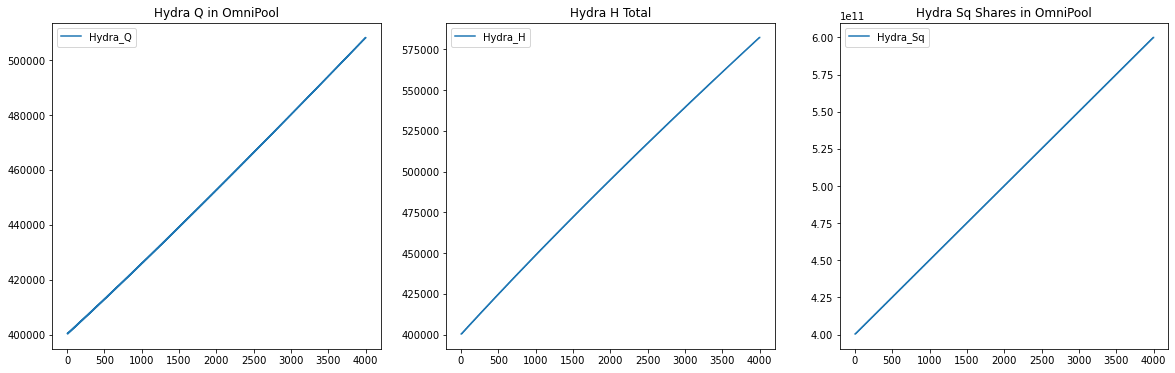

In [17]:
plt.figure(figsize=(20,6))
ax = plt.subplot(131)
hydra.astype(float).plot(ax=ax, y=['Hydra_Q'])
plt.title('Hydra Q in OmniPool')

ax = plt.subplot(132) 
hydra.astype(float).plot(ax=ax, y=['Hydra_H'])
plt.title('Hydra H Total')

ax = plt.subplot(133)
hydra.astype(float).plot(ax=ax, y=['Hydra_Sq'])
plt.title('Hydra Sq Shares in OmniPool')
plt.show()

### quantities, i-th asset, hydra instance

The following command line creates three plots for the Hydra Omnipool (for the i-th asset)


the function has the following arguments: 

    def hydra_pool_plot(experiments,test_title,T, asset_id):

and for each simulation step appends the following lists:
    
    asset_R = []
    asset_S = []
    asset_P = []


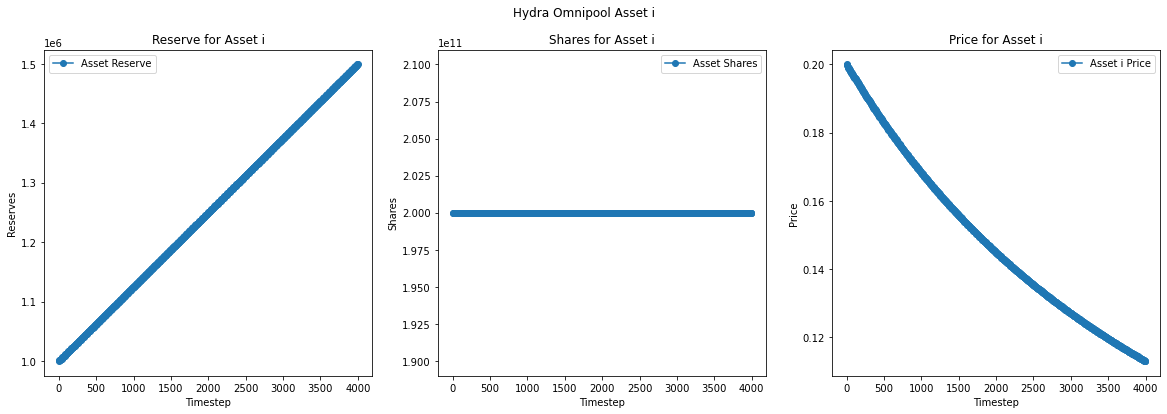

In [18]:
hydra_pool_plot(rdf,'Asset i Reserve and Shares', rdf.last_valid_index(),str('i'))

### quantities, j-th asset, hydra instance

The following command line creates three plots for the Hydra Omnipool (for the j-th asset)


the function has the following arguments: 

    def hydra_pool_plot(experiments,test_title,T, asset_id):

and for each simulation step appends the following lists:
    
    asset_R = []
    asset_S = []
    asset_P = []


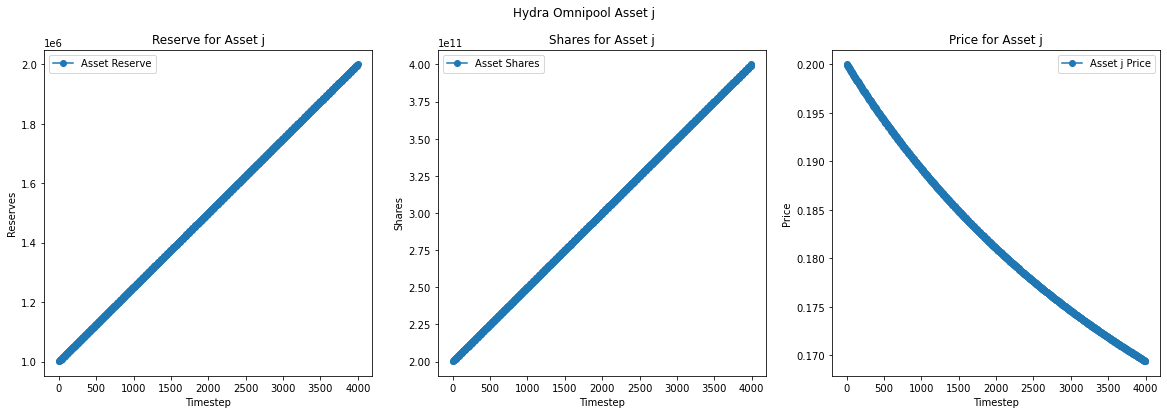

In [19]:
hydra_pool_plot(rdf,'Asset j Reserve and Shares', rdf.last_valid_index(),str('j'))

### price comparison, i-th and j-th asset, hydra instance

The following command line creates one plots for the Hydra Omnipool prices (for the i-th and j-th asset)


the function has the following arguments: 

    def hydra_pool_price_plot(experiments,test_title,T, asset_id_list):

and for each simulation step appends the following lists (one for each asset):
    
     asset_P_list = []
    

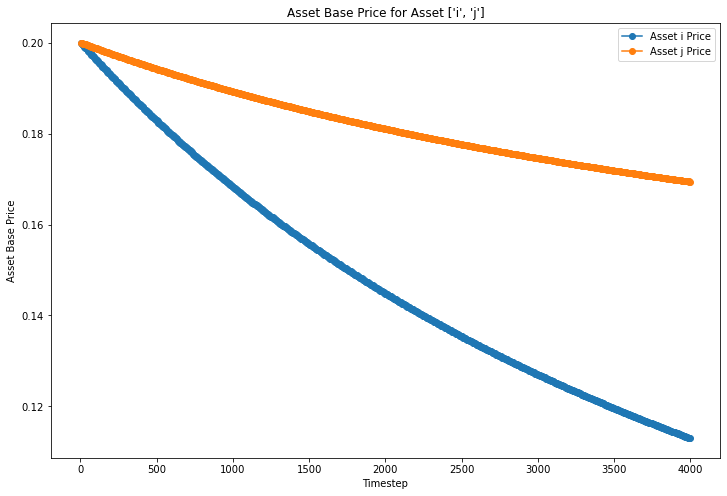

In [20]:
hydra_pool_price_plot(rdf,'Asset Base Price', rdf.last_valid_index(),['i', 'j'])

### agents & their holdings, hydra instance, 1st iteration

The following command line creates a table listing all agents and their respective characteristics in the Hydra system for the **first iteration** of the simulation :
- m: agent number
- r_i_out:
- r_i_in:
- h: 
- q_i:
- s_i:
- s_q:
- r_j_out:
- r_j_in:
- q_j
- s_j:

In [21]:
rdf['hydra_agents'][rdf.first_valid_index()]

m   r_i_out   r_i_in          h      q_i           s_i  s_q   r_j_out  \
0 0.00 100000.00     0.00  100000.00     0.00          0.00 0.00      0.00   
1 1.00 999000.00     0.00   10199.00     0.00          0.00 0.00      0.00   
2 2.00 100000.00     0.00  100000.00     0.00          0.00 0.00 100000.00   
3 3.00 100000.00 10000.00  100000.00 10000.00 1000000000.00 0.00      0.00   
4 4.00      0.00     0.00   10000.00     0.00          0.00 0.00 100000.00   
5 5.00      0.00     0.00  100000.00     0.00          0.00 0.00 100000.00   
6 6.00      0.00     0.00 1000000.00     0.00          0.00 0.00  98000.00   
7 7.00      0.00     0.00  100000.00     0.00 1000000000.00 0.00 100000.00   

    r_j_in      q_j           s_j  
0     0.00     0.00          0.00  
1     0.00     0.00          0.00  
2     0.00     0.00          0.00  
3     0.00     0.00 1000000000.00  
4     0.00     0.00          0.00  
5     0.00     0.00          0.00  
6  2000.00     0.00  400000000.00  
7 10000.00 10000.00 1000000000.00

### agents & their holdings, uniswap instance, 1st iteration

The following command line creates a table listing all agents and their respective characteristics in the Uniswap system for the **first iteration** of the simulation :

- m: agent number
- r_i_out:
- r_i_in:
- h: 
- q_i:
- s_i:
- s_q:
- r_j_out:
- r_j_in:
- q_j
- s_j:

In [22]:
rdf['uni_agents'][rdf.first_valid_index()]

m   r_i_out   r_i_in          h      q_i           s_i  s_q   r_j_out  \
0 0.00 100000.00     0.00  100000.00     0.00          0.00 0.00      0.00   
1 1.00 999000.00     0.00   10199.00     0.00          0.00 0.00      0.00   
2 2.00 100000.00     0.00  100000.00     0.00          0.00 0.00 100000.00   
3 3.00 100000.00 10000.00  100000.00 10000.00 1000000000.00 0.00      0.00   
4 4.00      0.00     0.00   10000.00     0.00          0.00 0.00 100000.00   
5 5.00      0.00     0.00  100000.00     0.00          0.00 0.00 100000.00   
6 6.00      0.00     0.00 1000000.00     0.00          0.00 0.00  98000.00   
7 7.00      0.00     0.00  100000.00     0.00 1000000000.00 0.00 100000.00   

    r_j_in      q_j           s_j  
0     0.00     0.00          0.00  
1     0.00     0.00          0.00  
2     0.00     0.00          0.00  
3     0.00     0.00 1000000000.00  
4     0.00     0.00          0.00  
5     0.00     0.00          0.00  
6  2000.00     0.00  400000000.00  
7 10000.00 10000.00 1000000000.00

### agents & their holdings, uniswap instance, 10th iteration

The following command line creates a table listing all agents and their respective characteristics in the Uniswap system for the **tenth iteration** of the simulation :


- m: agent number
- r_i_out:
- r_i_in:
- h: 
- q_i:
- s_i:
- s_q:
- r_j_out:
- r_j_in:
- q_j
- s_j:

In [23]:
rdf['uni_agents'][rdf.first_valid_index()*10]

m   r_i_out   r_i_in         h      q_i           s_i  s_q   r_j_out  \
0 0.00 100000.00     0.00 100000.00     0.00          0.00 0.00      0.00   
1 1.00 990000.00     0.00  11983.28     0.00          0.00 0.00      0.00   
2 2.00 100000.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
3 3.00 100000.00 10000.00 100000.00 10000.00 1000000000.00 0.00      0.00   
4 4.00      0.00     0.00  10000.00     0.00          0.00 0.00 100000.00   
5 5.00      0.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
6 6.00      0.00     0.00 997999.98     0.00          0.00 0.00  80000.00   
7 7.00      0.00     0.00 100000.00     0.00 1000000000.00 0.00 100000.00   

    r_j_in      q_j           s_j  
0     0.00     0.00          0.00  
1     0.00     0.00          0.00  
2     0.00     0.00          0.00  
3     0.00     0.00 1000000000.00  
4     0.00     0.00          0.00  
5     0.00     0.00          0.00  
6 20000.00  2000.02 4000000000.00  
7 10000.00 10000.00 1000000000.00

### agents & their holdings, Hydra instance, 10th iteration

The following command line creates a table listing all agents and their respective characteristics in the Hydra system for the **tenth iteration** of the simulation :
- m: agent number
- r_i_out:
- r_i_in:
- h: 
- q_i:
- s_i:
- s_q:
- r_j_out:
- r_j_in:
- q_j
- s_j:

In [24]:
rdf['hydra_agents'][rdf.first_valid_index()*10]

m   r_i_out   r_i_in         h      q_i           s_i  s_q   r_j_out  \
0 0.00 100000.00     0.00 100000.00     0.00          0.00 0.00      0.00   
1 1.00 990000.00     0.00  11983.28     0.00          0.00 0.00      0.00   
2 2.00 100000.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
3 3.00 100000.00 10000.00 100000.00 10000.00 1000000000.00 0.00      0.00   
4 4.00      0.00     0.00  10000.00     0.00          0.00 0.00 100000.00   
5 5.00      0.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
6 6.00      0.00     0.00 997999.98     0.00          0.00 0.00  80000.00   
7 7.00      0.00     0.00 100000.00     0.00 1000000000.00 0.00 100000.00   

    r_j_in      q_j           s_j  
0     0.00     0.00          0.00  
1     0.00     0.00          0.00  
2     0.00     0.00          0.00  
3     0.00     0.00 1000000000.00  
4     0.00     0.00          0.00  
5     0.00     0.00          0.00  
6 20000.00  2000.02 4000000000.00  
7 10000.00 10000.00 1000000000.00

### Individual Agent holdings comparison, uniswap instance


The following command line creates eight plots, one for each agent,  showing his holdings 


the function has the following arguments: 

    def agent_plot(experiments,test_title,T)

and for each simulation step appends the following lists:
    
    agent_h = []
    agent_r_i_out = []
    agent_r_i_in = []
    agent_r_j_out = []
    agent_r_j_in = []
    

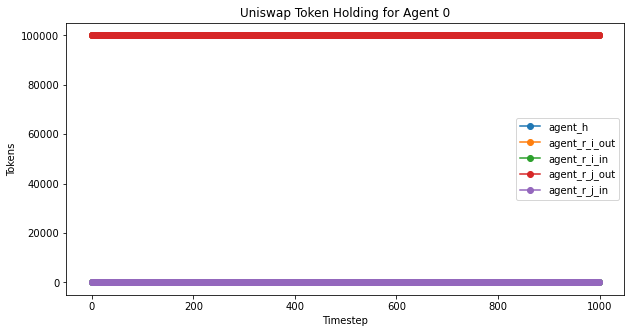

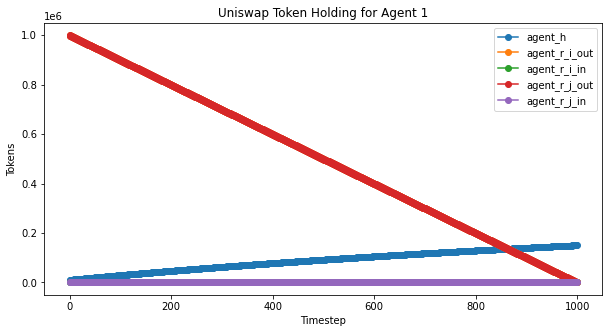

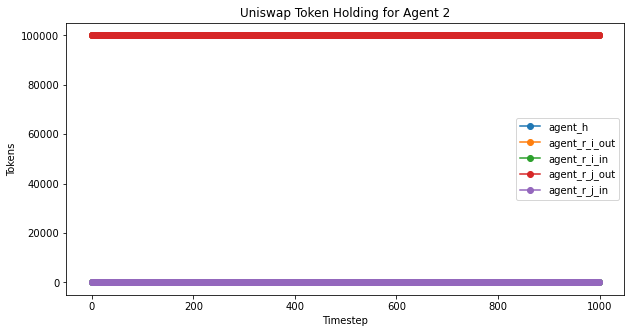

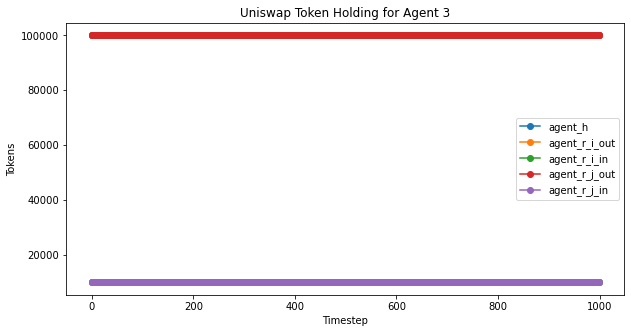

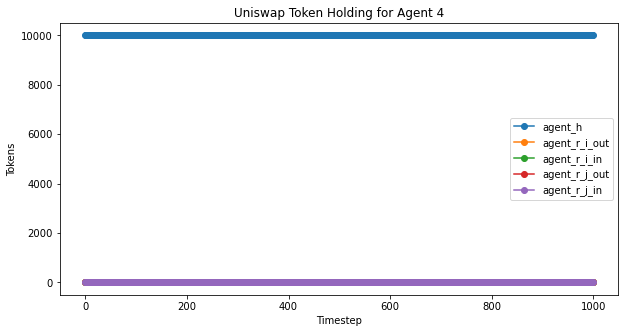

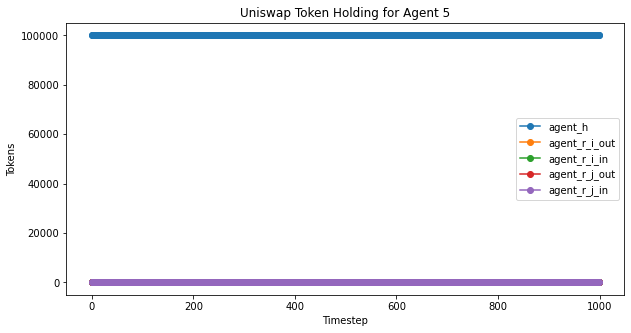

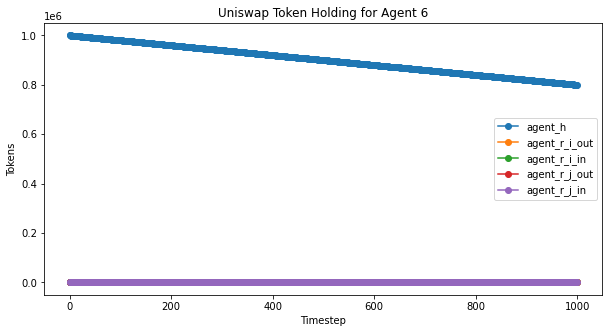

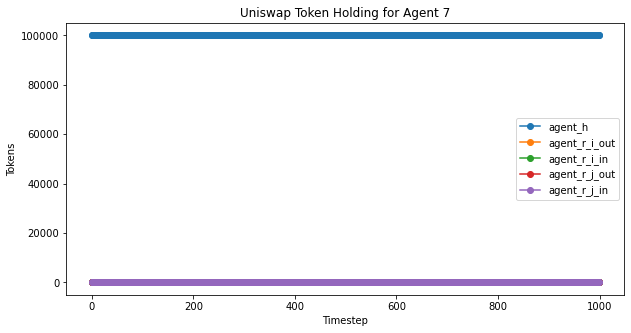

In [25]:
agent_plot(rdf,'Uniswap Token Holding for Agent ', len(rdf['timestep'])) #,4,'j')

### Individual Agent values comparison, Uniswap instance

The following command line creates eight plots, one for each agents showing his values 


the function has the following arguments: 

    def agent_value_plot(experiments,test_title,T)

and for each simulation step appends the following lists:
    
    agent_h = []
    agent_r_i_out = []
    agent_s_i = []
    agent_r_j_out = []
    agent_s_j = []
    



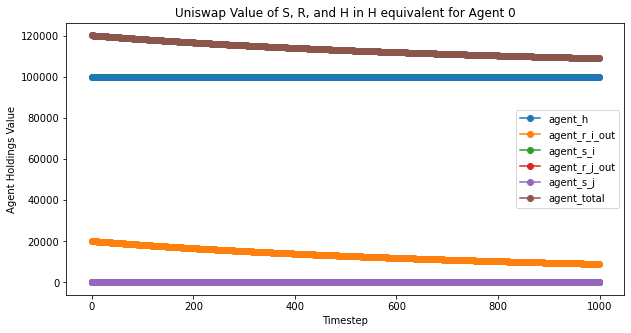

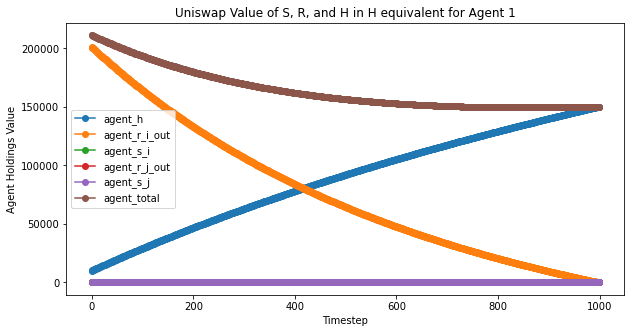

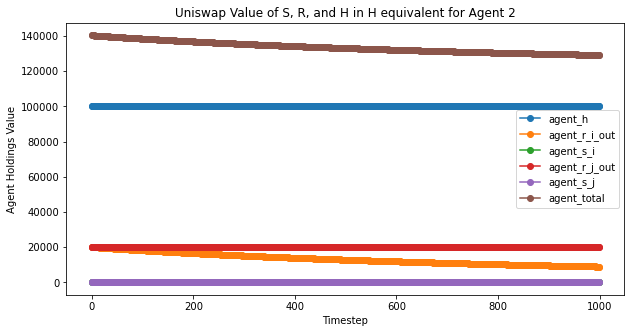

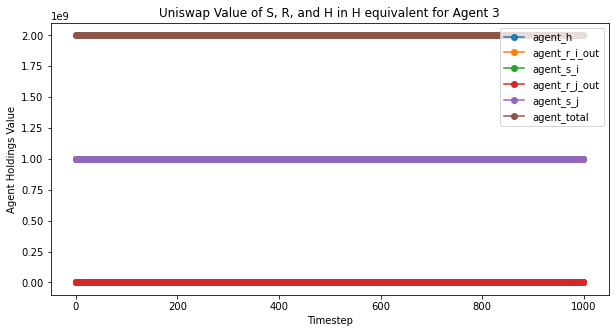

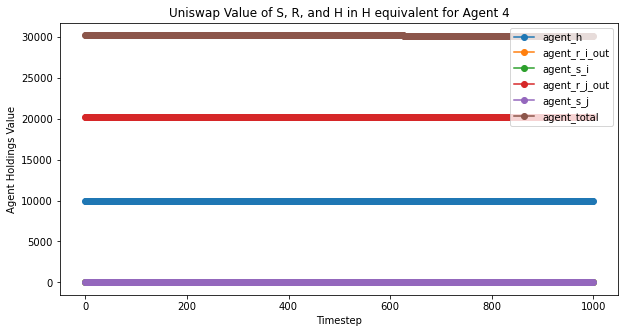

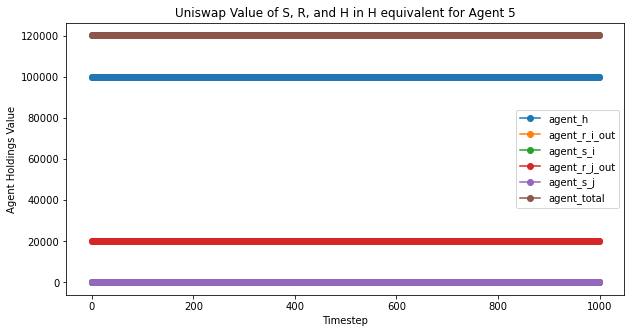

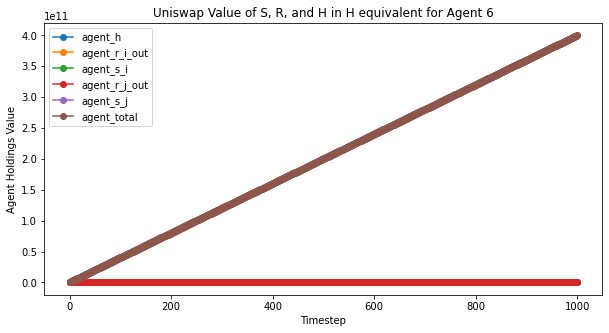

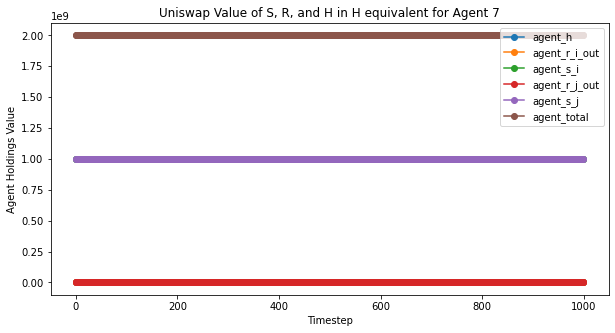

In [26]:
agent_value_plot(rdf,'Uniswap Value of S, R, and H in H equivalent', len(rdf['timestep'])) #,2, 'i')

### Individual Agent holdings comparison, Hydra instance

The following command line creates eight plots, one for each agents showing his holdings (in the Hydra system)


the function has the following arguments: 

    def hydra_agent_plot(experiments,test_title,T):

and for each simulation step appends the following lists:
    
    agent_h = []
    agent_r_i_out = []
    agent_r_i_in = []
    agent_r_j_out = []
    agent_r_j_in = []
    

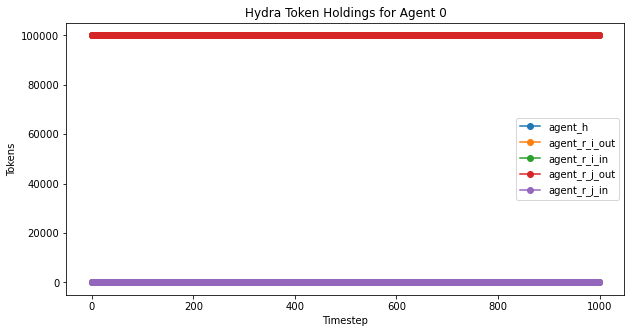

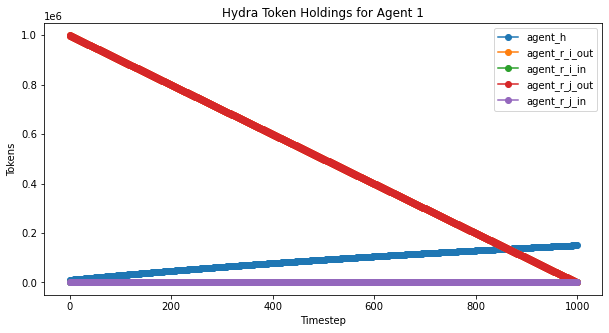

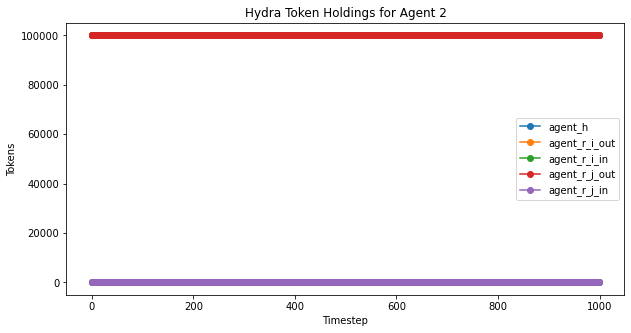

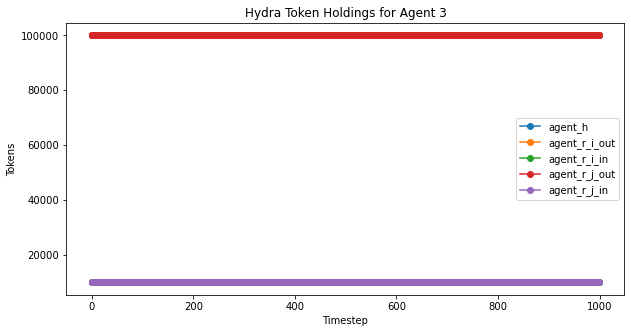

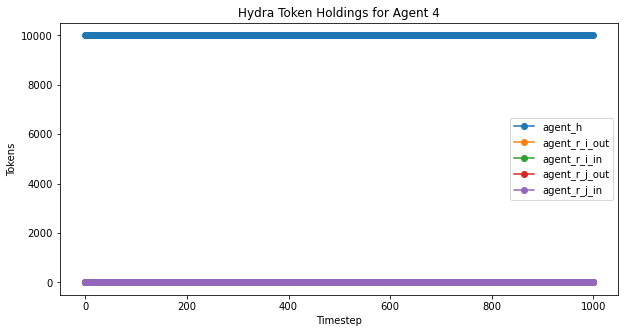

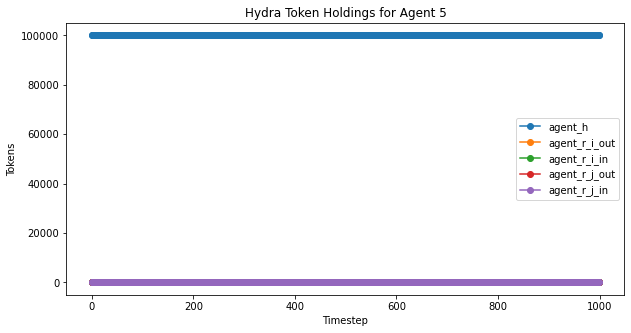

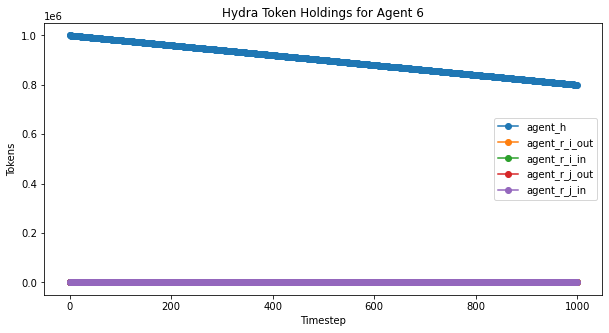

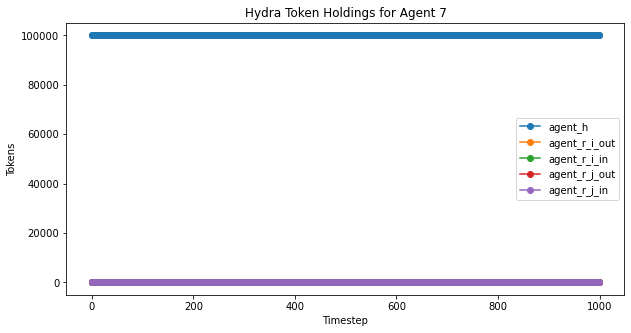

In [27]:
hydra_agent_plot(rdf,'Hydra Token Holdings for Agent ', len(rdf['timestep']))

### Individual Agent values comparison, Hydra instance

The following command line creates eight plots, one for each agents showing his values (in the Hydra system)


the function has the following arguments: 

    def hydra_agent_value_plot(experiments,test_title,T)

and for each simulation step appends the following lists:
    
    agent_h = []
    agent_r_i_out = []
    agent_r_i_in = []
    agent_r_j_out = []
    agent_r_j_in = []

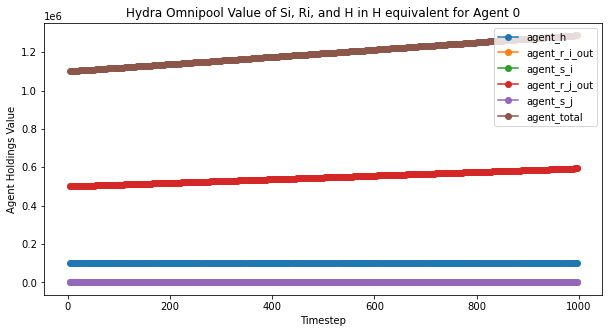

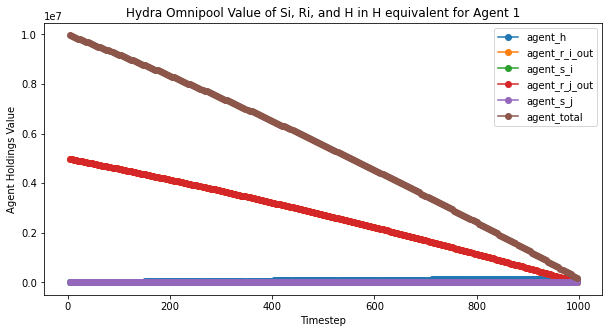

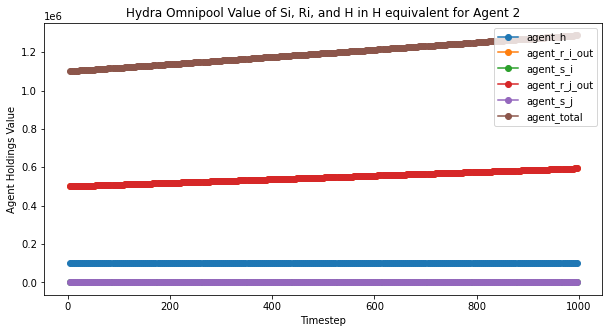

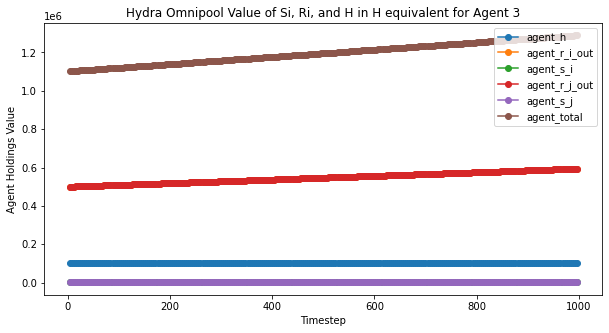

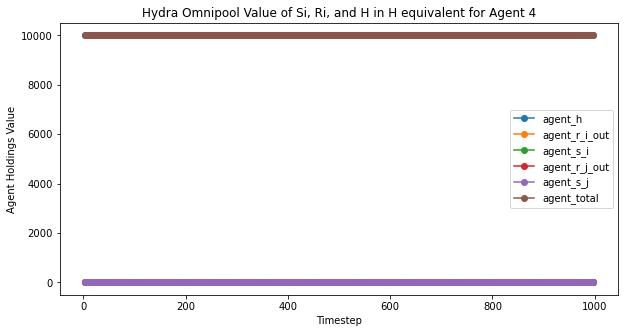

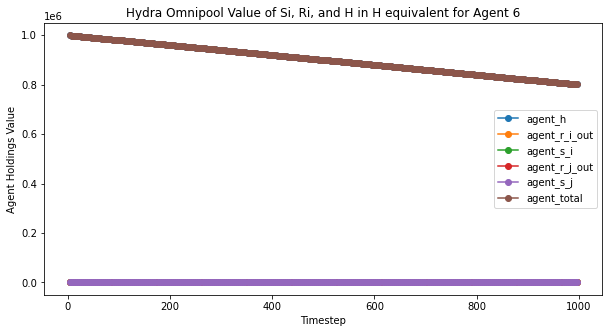

In [28]:
hydra_agent_value_plot(rdf,'Hydra Omnipool Value of Si, Ri, and H in H equivalent', len(rdf['timestep'])) #,2, 'i')

### Impermanent Loss (IL) calculation

Impermanent loss is defined as 

$$
IL = \frac{\delta Pool Value}{\delta Hold Value} - 1
$$

The following command creates a plot of Impermanent Loss which has the following arguments:

    def IL_plot(experiments,test_title, periods)
    
and calculates the IL according to

    
    UNI_IL_i = 2* np.sqrt(df.UNI_P_RQi.pct_change(periods)) / (1 + df.UNI_P_RQi.pct_change(periods)) - 1
    UNI_IL_j = 2* np.sqrt(df.UNI_P_RQj.pct_change(periods)) / (1 + df.UNI_P_RQj.pct_change(periods)) - 1

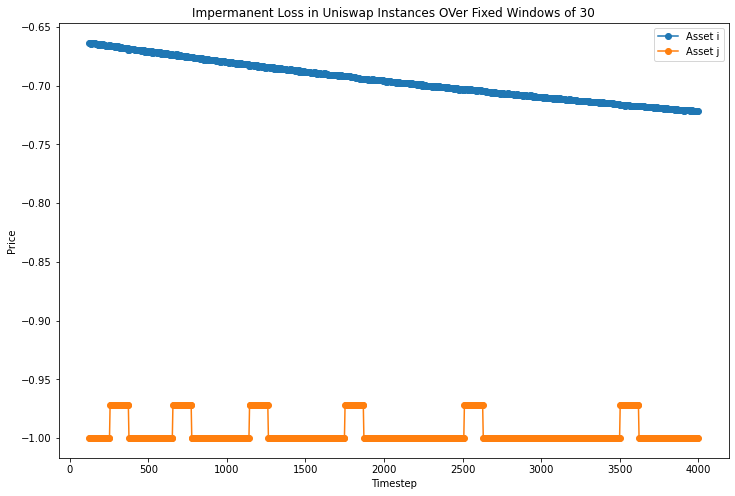

In [29]:
IL_plot(rdf,'Impermanent Loss in Uniswap Instances OVer Fixed Windows of ', 30)